<a href="https://colab.research.google.com/github/jennahgosciak/nyc_fire_risk/blob/main/00_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pandas fiona shapely pyproj rtree
!pip install geopandas
!pip install gdal
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import requests
import calendar

     |████████████████████████████████| 15.4 MB 20.3 MB/s 
     |████████████████████████████████| 6.3 MB 42.4 MB/s 
     |████████████████████████████████| 994 kB 56.5 MB/s 
     |████████████████████████████████| 1.0 MB 21.3 MB/s 


# Load data on fire dispatch events
## From January 1st, 2017 through the present
* Create a plot of fire events each year
* Only structural fires are included


In [18]:
url_fire_ev = 'https://data.cityofnewyork.us/resource/8m42-w767.csv?$limit=1000000&$where=incident_datetime>="2017-01-01"%20AND%20INCIDENT_CLASSIFICATION_GROUP="Structural%20Fires"'
fire_ev = pd.read_csv(url_fire_ev)
print(fire_ev.shape)

# if false, then we might not have downloaded all data
print(fire_ev.shape[0])
assert fire_ev.shape[0] < 1000000

(115079, 29)
115079


In [19]:
fire_ev["incident_date"]= pd.to_datetime(fire_ev["incident_datetime"]).dt.date
fire_ev["incident_month"]= pd.to_datetime(fire_ev["incident_datetime"]).dt.month
fire_ev["incident_day"]= pd.to_datetime(fire_ev["incident_datetime"]).dt.day
fire_ev["incident_year"]= pd.to_datetime(fire_ev["incident_datetime"]).dt.year

fire_ev["incident_md"]= fire_ev[["incident_month", "incident_day"]].astype(str).apply('-'.join, 1)

## More fire events occur in late November, December, and early January

([<matplotlib.axis.XTick at 0x7f4dfaeefc50>,
 [Text(0, 0, 'January'),
  Text(0, 0, 'February'),
  Text(0, 0, 'March'),
  Text(0, 0, 'April'),
  Text(0, 0, 'May'),
  Text(0, 0, 'June'),
  Text(0, 0, 'July'),
  Text(0, 0, 'August'),
  Text(0, 0, 'September'),
  Text(0, 0, 'October'),
  Text(0, 0, 'November'),
  Text(0, 0, 'December')])

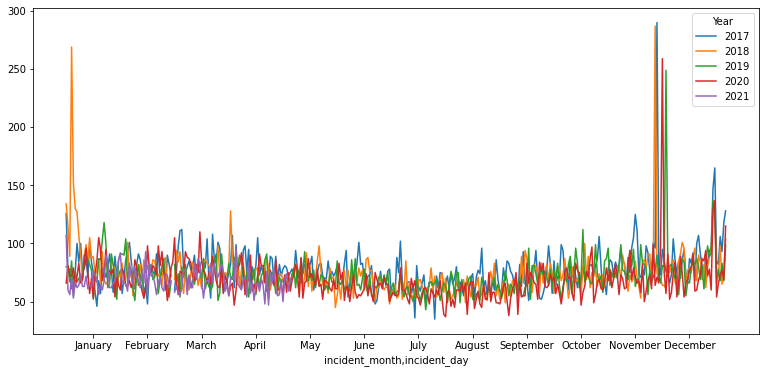

In [20]:
fire_ev_plt_df= fire_ev.groupby(["incident_year", "incident_month", "incident_day"]).size().unstack(level = 'incident_year')
fire_ev_plt_df.columns.name= "Year"

fig, ax = plt.subplots(figsize=(13, 6))
fire_ev_plt_df.plot(ax = ax)

x = [(x, 15) for x in list(range(1,13))]

plt.xticks(np.arange(15, 365, round(365/12)), labels = [x for x in calendar.month_name if x is not ''])

# Load data on vacate orders from HPD, due to fire
## From January 1st, 2017 through the present

In [5]:
url_vac = 'https://data.cityofnewyork.us/resource/tb8q-a3ar.csv?$limit=1000000&$where=vacate_effective_date>="2017-01-01"%20AND%20primary_vacate_reason="Fire%20Damage"'
vac = pd.read_csv(url_vac)
print(vac.shape)

# if false, then we might not have downloaded all data
print(vac.shape[0])
assert vac.shape[0] < 1000000

(1512, 20)
1512


In [10]:
vac["vacate_effective_date2"]= pd.to_datetime(vac["vacate_effective_date"]).dt.date
vac["vacate_effective_month"]= pd.to_datetime(vac["vacate_effective_date"]).dt.month
vac["vacate_effective_day"]= pd.to_datetime(vac["vacate_effective_date"]).dt.day
vac["vacate_effective_year"]= pd.to_datetime(vac["vacate_effective_date"]).dt.year

vac["vacate_effective_md"]= vac[["vacate_effective_month", "vacate_effective_day"]].astype(str).apply('-'.join, 1)

Text(0.5, 0, 'Date')

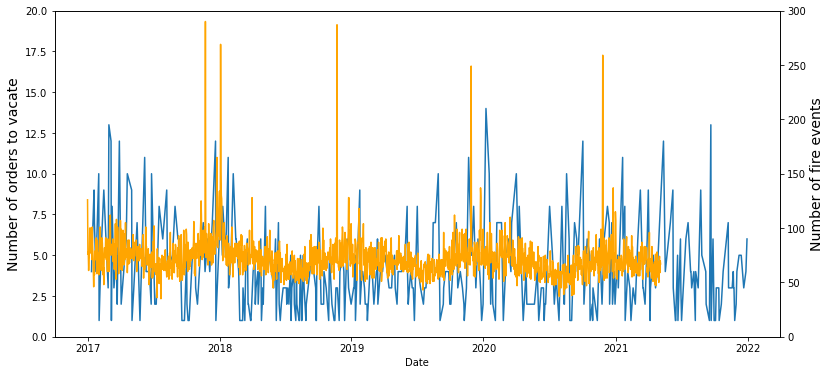

In [78]:
fig, ax = plt.subplots(figsize=(13, 6))
vac.loc[vac["vacate_effective_year"] < 2022, :].groupby("vacate_effective_date2").size().plot(ax = ax)
ax.set_ylabel("Number of orders to vacate", fontsize=14)
ax.set_ylim([0, 20])

# set second axis
ax2=ax.twinx()
fire_ev.groupby("incident_date").size().plot(ax = ax2, color = "orange")
ax2.set_ylabel("Number of fire events", fontsize=14)
ax2.set_ylim([0, 300])

ax.set_xlabel("Date")

In [85]:
from google.colab import files

vac.to_csv('vacate_orders.csv')
files.download('vacate_orders.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Year                                         2017
vacate_effective_month vacate_effective_day      
1                      4                      0.0
                       6                      0.0
                       7                      0.0
                       8                      0.0
                       9                      0.0
...                                           ...
12                     24                     0.0
                       27                     0.0
                       28                     0.0
                       30                     0.0
                       31                     0.0

[241 rows x 1 columns]

In [50]:
vac_plt_df.columns.get_level_values("Year") == 2017

array([ True, False, False, False, False, False])